In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('traffic sign','train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [3]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_dev, y_train, y_dev = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_dev.shape, y_train.shape, y_dev.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/30
491/491 [==============================] - 80s 163ms/step - loss: 2.4699 - accuracy: 0.3890 - val_loss: 0.8253 - val_accuracy: 0.7700
Epoch 2/30
491/491 [==============================] - 83s 168ms/step - loss: 0.9983 - accuracy: 0.7062 - val_loss: 0.4637 - val_accuracy: 0.8661
Epoch 3/30
491/491 [==============================] - 82s 168ms/step - loss: 0.7295 - accuracy: 0.7770 - val_loss: 0.2867 - val_accuracy: 0.9174
Epoch 4/30
491/491 [==============================] - 82s 166ms/step - loss: 0.6260 - accuracy: 0.8086 - val_loss: 0.2637 - val_accuracy: 0.9241
Epoch 5/30
491/491 [==============================] - 77s 156ms/step - loss: 0.5551 - accuracy: 0.8284 - val_loss: 0.3469 - val_accuracy: 0.8944
Epoch 6/30
491/491 [==============================] - 81s 165ms/step - loss: 0.5010 - accuracy: 0.8479 - val_loss: 0.1970 - val_accuracy: 0.9439
Epoch 7/30
491/491 [==============================] - 83s 168ms/step - loss: 0.4341 - accuracy: 0.8673 - val_loss: 0.1437 - val_ac

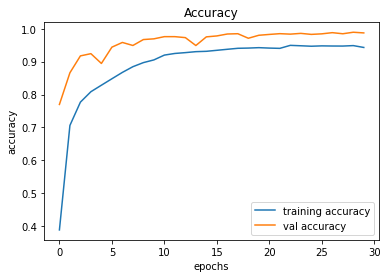

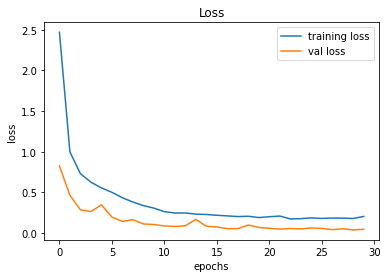

In [5]:
epochs = 30
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_dev, y_dev))

#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [6]:
from sklearn.metrics import accuracy_score

#y_test = pd.read_csv(os.path.join('traffic sign','Test.csv',delimiter))
y_test = pd.read_csv(os.path.join('traffic sign','Test.csv'),delimiter=',')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open('traffic sign'+'/'+img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.9507521773555028
